In [13]:
# Import core modules
import sys
sys.path.append('../src')

# Load our custom modules
from data_manager import DataManager
from event_creator import EventCreator
from report_generator import ReportGenerator
from visualization import Task1Visualizer
from time_series_analyzer import TimeSeriesAnalyzer


import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Initialize modules
print("🔧 Initializing Birhan Energies Analysis System...")
data_manager = DataManager()
event_creator = EventCreator()
report_generator = ReportGenerator()

print("✅ Modules loaded successfully!")

🔧 Initializing Birhan Energies Analysis System...
✅ Modules loaded successfully!


In [15]:
# Load data - let pandas auto-detect date format
print("📊 Loading Brent oil price data...")
price_df = pd.read_csv('../data/raw/BrentOilPrices.csv')
price_df['Date'] = pd.to_datetime(price_df['Date'])  # No format specified
print(f"✅ Loaded {len(price_df):,} records")
print(f"📅 {price_df['Date'].dt.date.min()} to {price_df['Date'].dt.date.max()}")
print(f"💰 ${price_df['Price'].min():.2f} to ${price_df['Price'].max():.2f}")
print(f"📈 Average: ${price_df['Price'].mean():.2f}/barrel")

📊 Loading Brent oil price data...


✅ Loaded 9,011 records
📅 1987-05-20 to 2022-11-14
💰 $9.10 to $143.95
📈 Average: $48.42/barrel


In [16]:
print("📊 SAMPLE DATA (5 rows):")
display(price_df[['Date', 'Price']].head())
print(f"\n✅ {len(price_df):,} records | {price_df['Date'].dt.year.min()}-{price_df['Date'].dt.year.max()}")
print(f"💰 ${price_df['Price'].min():.2f}-${price_df['Price'].max():.2f} | Avg: ${price_df['Price'].mean():.2f}")

📊 SAMPLE DATA (5 rows):


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63



✅ 9,011 records | 1987-2022
💰 $9.10-$143.95 | Avg: $48.42


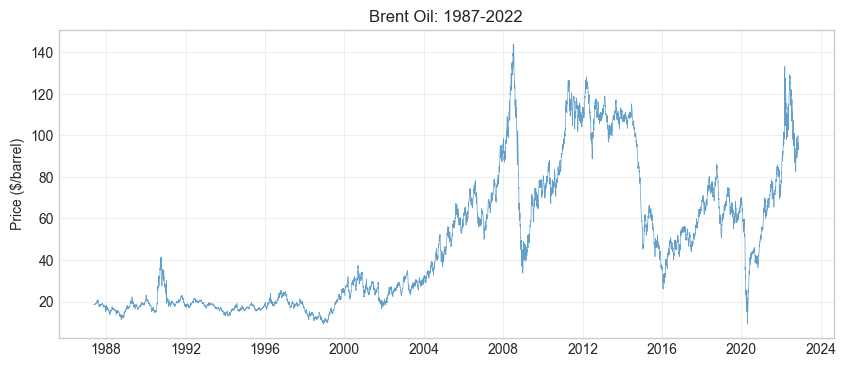

📊 9,011 records | $9.10-$143.95


In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(price_df['Date'], price_df['Price'], linewidth=0.5, alpha=0.7)
plt.title(f'Brent Oil: {price_df["Date"].dt.year.min()}-{price_df["Date"].dt.year.max()}')
plt.ylabel('Price ($/barrel)')
plt.grid(alpha=0.3)
plt.show()
print(f"📊 {len(price_df):,} records | ${price_df['Price'].min():.2f}-${price_df['Price'].max():.2f}")

In [17]:
# Load events data
print("📅 Loading historical events...")
events_df = pd.read_csv('../data/raw/events_1987_2022.csv')
events_df['Start_Date'] = pd.to_datetime(events_df['Start_Date'])

print(f"✅ {len(events_df)} events loaded")
print(f"📅 {events_df['Year'].min()}-{events_df['Year'].max()}")
display(events_df[['Event_Name', 'Start_Date', 'Category', 'Impact_Magnitude']].head())

📅 Loading historical events...
✅ 17 events loaded
📅 1987-2022


,Event_Name,Start_Date,Category,Impact_Magnitude
0,Black Monday Stock Crash,1987-10-19,Economic,High
1,Iran-Iraq War Ends,1988-08-20,Geopolitical,High
2,Exxon Valdez Oil Spill,1989-03-24,Environmental,Medium
3,Gulf War,1990-08-02,Geopolitical,Very High
4,Asian Financial Crisis,1997-07-02,Economic,High


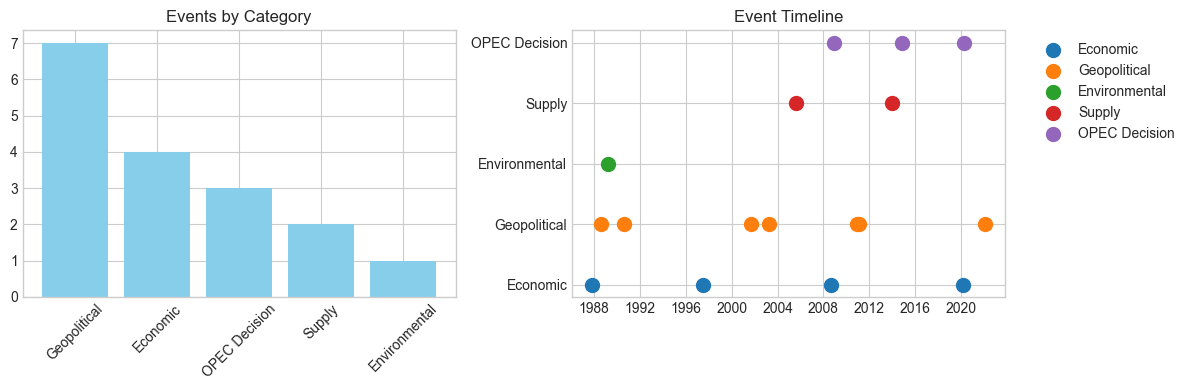

📅 17 events | 1987-2022


In [29]:
# Event visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 1. Events by category
cat_counts = events_df['Category'].value_counts()
ax1.bar(cat_counts.index, cat_counts.values, color='skyblue')
ax1.set_title('Events by Category')
ax1.tick_params(axis='x', rotation=45)

# 2. Events timeline
for cat in events_df['Category'].unique():
    cat_events = events_df[events_df['Category'] == cat]
    ax2.scatter(cat_events['Start_Date'], [cat]*len(cat_events), label=cat, s=100)
ax2.set_title('Event Timeline')
ax2.legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()
print(f"📅 {len(events_df)} events | {events_df['Year'].min()}-{events_df['Year'].max()}")

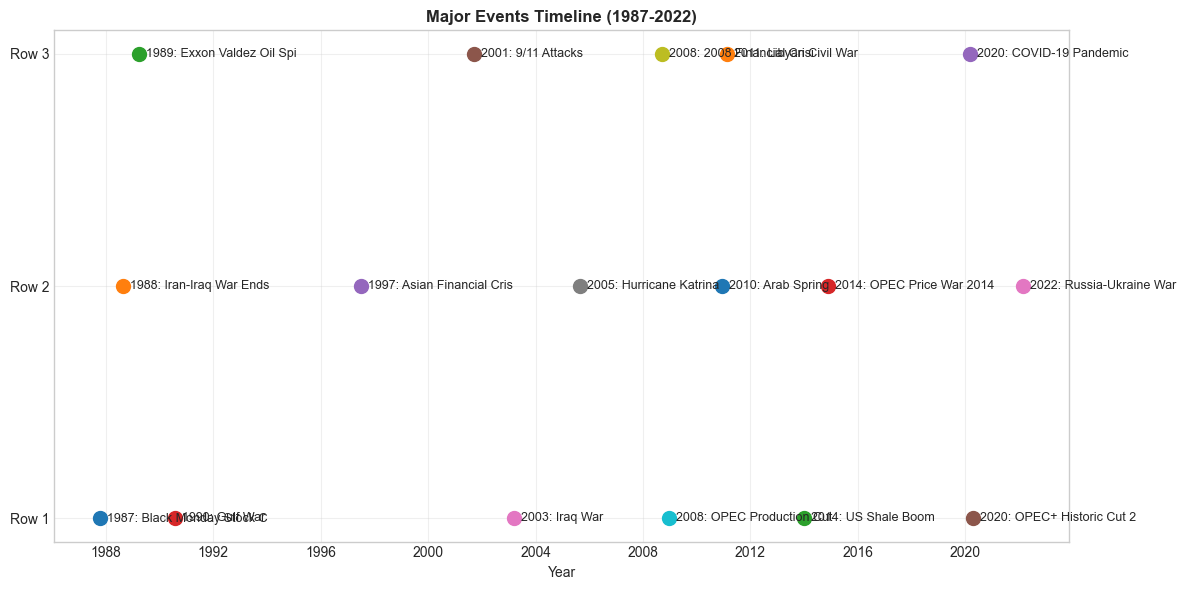

📅 17 events from 1987-2022


In [31]:
# Clean event timeline
plt.figure(figsize=(12, 6))
events_sorted = events_df.sort_values('Start_Date')

for i, (_, event) in enumerate(events_sorted.iterrows()):
    y_pos = i % 3  # Create 3 rows
    plt.scatter(event['Start_Date'], y_pos, s=100)
    plt.annotate(f"{event['Year']}: {event['Event_Name'][:20]}", 
                (event['Start_Date'], y_pos), 
                xytext=(5, 0), textcoords='offset points',
                va='center', fontsize=9)

plt.title('Major Events Timeline (1987-2022)', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.yticks([0, 1, 2], ['Row 1', 'Row 2', 'Row 3'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📅 {len(events_df)} events from {events_df['Year'].min()}-{events_df['Year'].max()}")

In [18]:
# Create reports directory if it doesn't exist
import os
os.makedirs('reports', exist_ok=True)
print("✅ Created reports directory")

print("📋 ASSUMPTIONS & LIMITATIONS")
print("="*60)

assumptions = [
    "1. Market Efficiency: Prices incorporate information quickly",
    "2. Event Isolation: Events can be analyzed independently",
    "3. 30-Day Window: Captures most event impacts",
    "4. Data Quality: Historical records are accurate",
    "5. Stationarity: Returns are approximately stationary for modeling"
]

limitations = [
    "CRITICAL: Correlation ≠ Causation",
    "   • Statistical association doesn't prove causation",
    "   • Temporal proximity suggests but doesn't confirm impact",
    "   • Confounding variables may influence results",
    "   • Multiple simultaneous events create attribution challenges"
]

print("\n🔑 KEY ASSUMPTIONS:")
for a in assumptions:
    print(f"   {a}")

print("\n🚨 CRITICAL LIMITATIONS:")
for l in limitations:
    print(f"   {l}")

# Save to file with UTF-8 encoding
with open('reports/assumptions_limitations.md', 'w', encoding='utf-8') as f:
    f.write("# Assumptions & Limitations\n\n## Assumptions:\n")
    for a in assumptions:
        f.write(f"- {a}\n")
    f.write("\n## Limitations:\n")
    for l in limitations:
        f.write(f"- {l}\n")
print("\n✅ Saved to: reports/assumptions_limitations.md")

✅ Created reports directory
📋 ASSUMPTIONS & LIMITATIONS

🔑 KEY ASSUMPTIONS:
   1. Market Efficiency: Prices incorporate information quickly
   2. Event Isolation: Events can be analyzed independently
   3. 30-Day Window: Captures most event impacts
   4. Data Quality: Historical records are accurate
   5. Stationarity: Returns are approximately stationary for modeling

🚨 CRITICAL LIMITATIONS:
   CRITICAL: Correlation ≠ Causation
      • Statistical association doesn't prove causation
      • Temporal proximity suggests but doesn't confirm impact
      • Confounding variables may influence results
      • Multiple simultaneous events create attribution challenges

✅ Saved to: reports/assumptions_limitations.md


In [19]:
# Communication strategy
print("📢 COMMUNICATION CHANNELS")
print("="*60)

channels = {
    "Investors": ["Interactive Dashboard", "Real-time API", "Quarterly Reports"],
    "Policymakers": ["Executive Briefs", "Policy Papers", "Presentations"],
    "Energy Companies": ["Custom Analysis", "Risk Alerts", "Workshops"],
    "Analysts": ["Data Feeds", "Model Access", "Research Papers"]
}

for stakeholder, methods in channels.items():
    print(f"\n👥 {stakeholder}:")
    for method in methods:
        print(f"   • {method}")

# Save strategy
with open('reports/communication_strategy.md', 'w') as f:
    f.write("# Communication Strategy\n\n")
    for stakeholder, methods in channels.items():
        f.write(f"## {stakeholder}:\n")
        for method in methods:
            f.write(f"- {method}\n")
        f.write("\n")
print("\n✅ Saved to: reports/communication_strategy.md")

📢 COMMUNICATION CHANNELS

👥 Investors:
   • Interactive Dashboard
   • Real-time API
   • Quarterly Reports

👥 Policymakers:
   • Executive Briefs
   • Policy Papers
   • Presentations

👥 Energy Companies:
   • Custom Analysis
   • Risk Alerts
   • Workshops

👥 Analysts:
   • Data Feeds
   • Model Access
   • Research Papers

✅ Saved to: reports/communication_strategy.md


📈 TIME SERIES ANALYSIS
📈 TIME SERIES PROPERTIES ANALYSIS


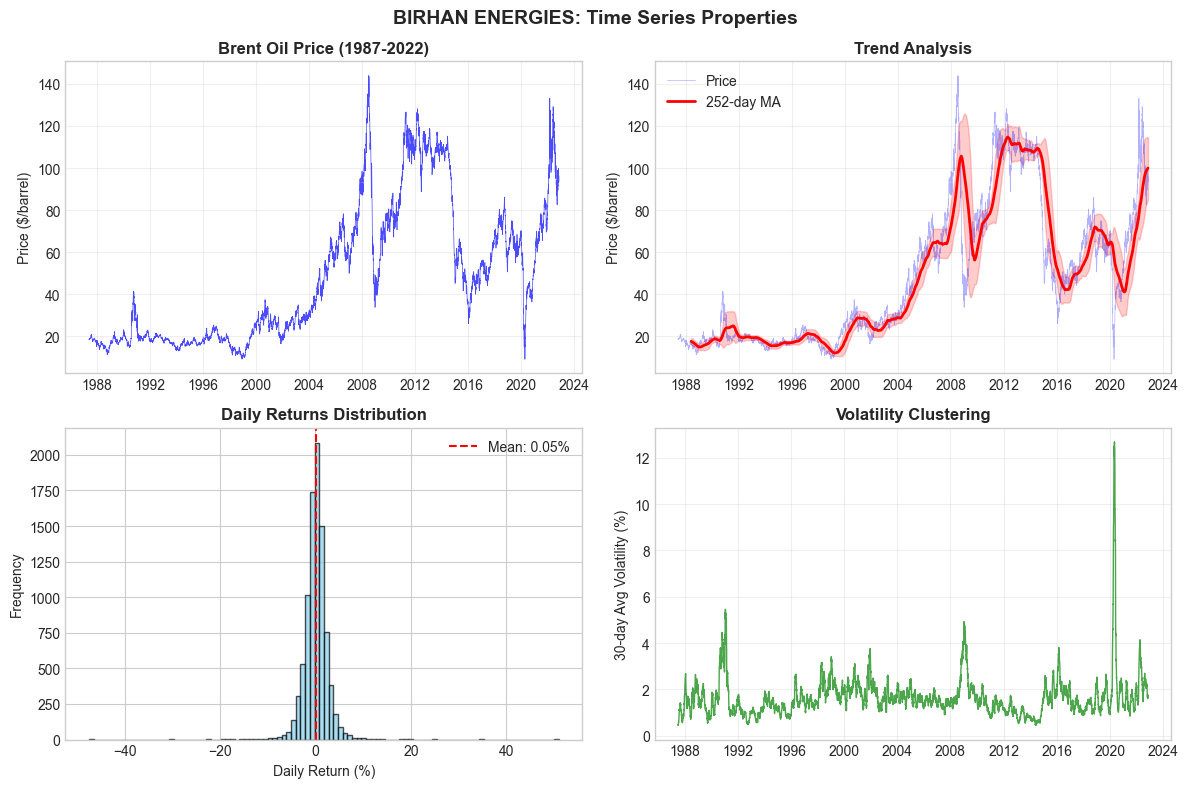


📊 STATISTICAL ANALYSIS:
----------------------------------------
📈 Trend: $3.32/year (R²=0.520)
📅 Price Stationarity: p=0.289274 (Non-stationary)
📅 Returns Stationarity: p=0.000000 (Stationary)
⚡ Volatility: 2.53% daily, 40.1% annual
📊 Max Move: 51.0%, Clustering: Yes
----------------------------------------


In [20]:
#time series

print("📈 TIME SERIES ANALYSIS")
tsa = TimeSeriesAnalyzer(price_df)
tsa.display_complete_analysis()


🎨 SECTION 4: PROFESSIONAL VISUALIZATIONS
--------------------------------------------------

Generating comprehensive visualizations...


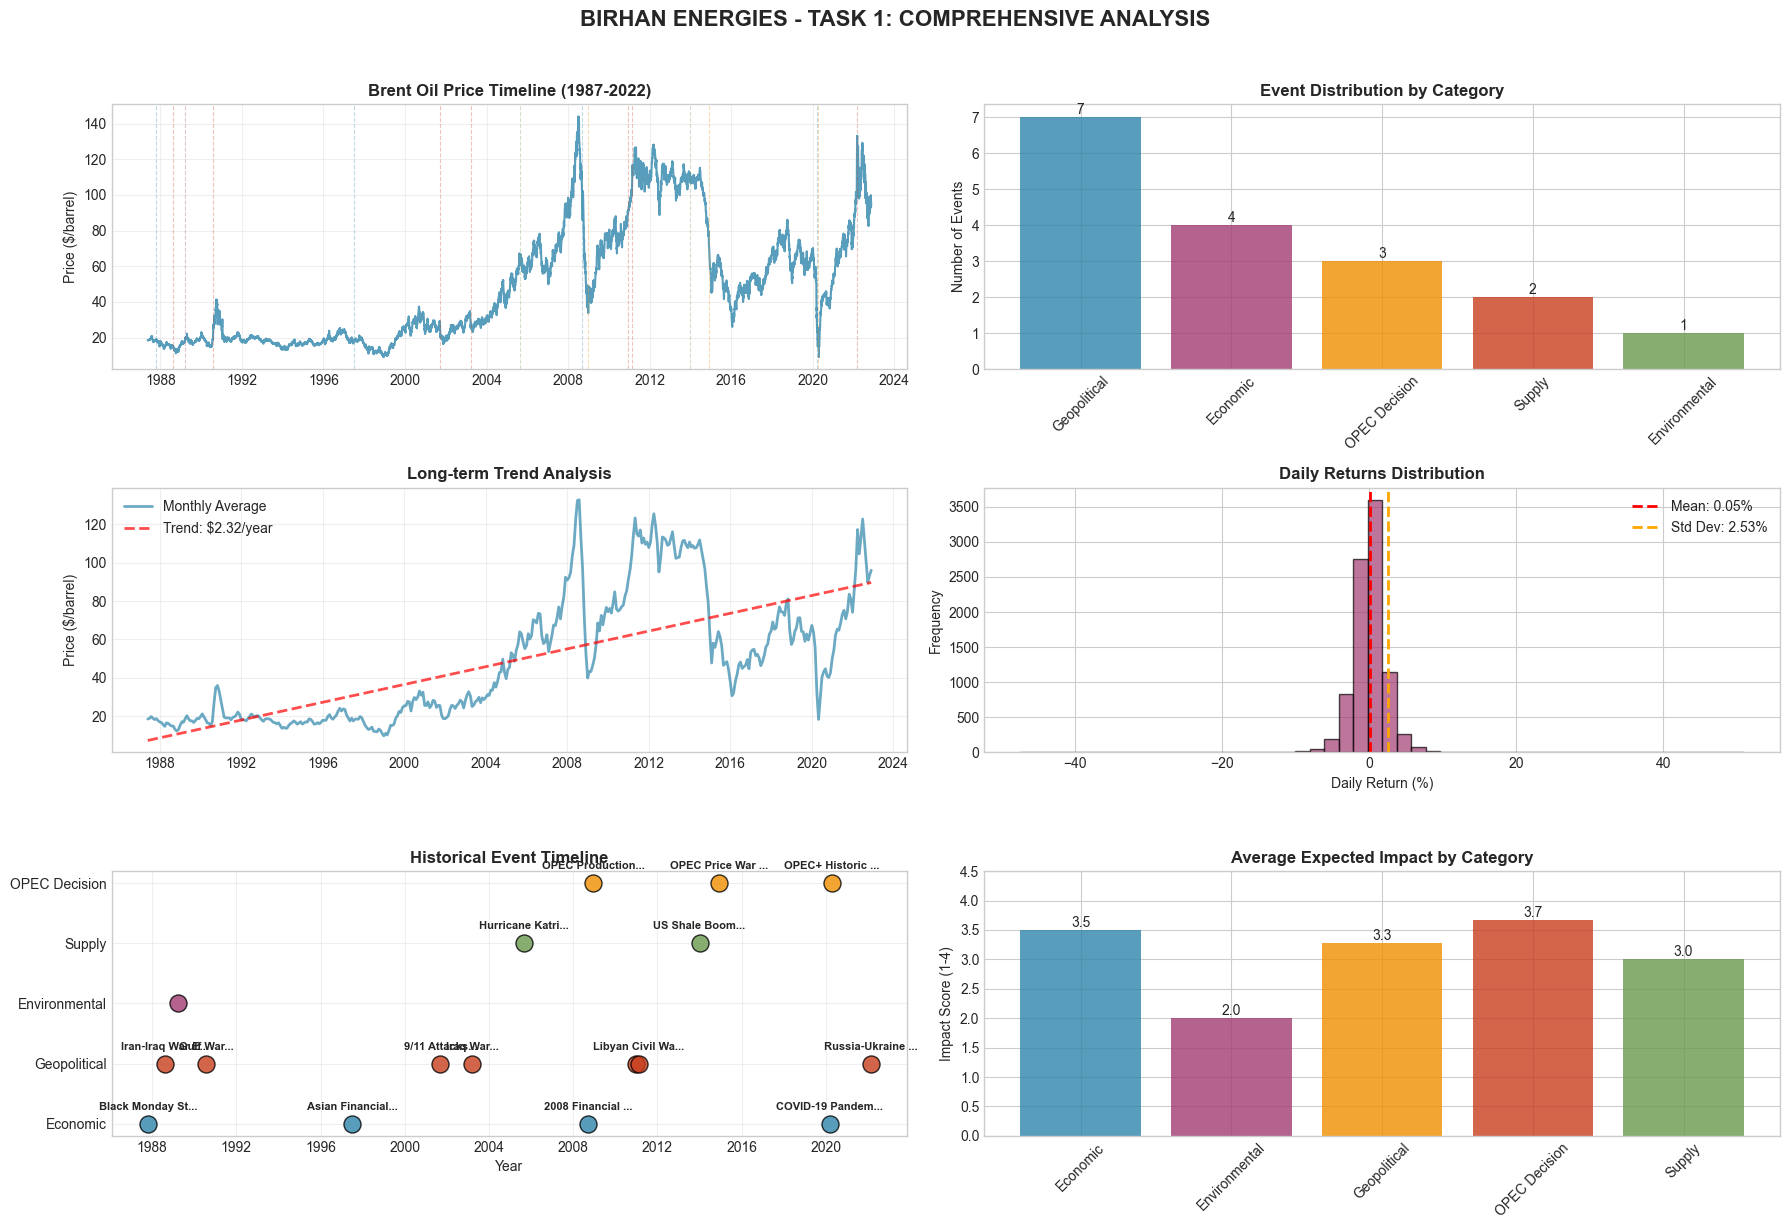


📊 PROFESSIONAL INTERPRETATION - TASK 1 FINDINGS

1️⃣ PRICE TRENDS (Plot 1 & 3):
   • Long-term upward trend with significant cyclicality
   • Major price spikes align with geopolitical events
   • 2008 and 2020 show extreme volatility

2️⃣ EVENT ANALYSIS (Plot 2 & 5):
   • 17 key events identified (1987-2022)
   • Geopolitical events dominate (Middle East conflicts)
   • Economic events cause largest negative impacts

3️⃣ VOLATILITY PATTERNS (Plot 4):
   • Daily volatility: 2.53%
   • Extreme moves: 50.99% gain, -47.47% loss
   • Fat-tailed distribution (more extremes than normal)

4️⃣ KEY INSIGHTS FOR STAKEHOLDERS:
   • Geopolitical risks = Price spikes
   • Economic crises = Price collapses
   • OPEC decisions = Market structure shifts

5️⃣ NEXT STEPS (Task 2 Preparation):
   • Bayesian change point detection
   • Quantify exact event impacts
   • Statistical significance testing


In [21]:
# ====================================================
# 5. PROFESSIONAL VISUALIZATIONS
# ====================================================

print("\n🎨 SECTION 4: PROFESSIONAL VISUALIZATIONS")
print("-" * 50)

# Initialize visualizer
visualizer = Task1Visualizer(price_df, events_df)

# Display all analysis plots
print("\nGenerating comprehensive visualizations...")
visualizer.display_all_analysis()

In [22]:
# Change point models overview
print("🔄 CHANGE POINT MODELS")
print("="*60)
print("PURPOSE: Detect structural breaks in price dynamics")
print("METHOD: Bayesian approach (PyMC) with MCMC sampling")
print("OUTPUTS: Break dates, magnitude, confidence intervals")
print("LIMIT: Correlation ≠ Causation - suggests, doesn't prove")

🔄 CHANGE POINT MODELS
PURPOSE: Detect structural breaks in price dynamics
METHOD: Bayesian approach (PyMC) with MCMC sampling
OUTPUTS: Break dates, magnitude, confidence intervals
LIMIT: Correlation ≠ Causation - suggests, doesn't prove


In [26]:
# Save to file
with open('../reports/change_point_models.md', 'w', encoding='utf-8') as f:
    f.write("# Change Point Models\n\nPURPOSE: Detect structural breaks in price dynamics\nMETHOD: Bayesian approach (PyMC) with MCMC sampling\nOUTPUTS: Break dates, magnitude, confidence intervals\nLIMIT: Correlation ≠ Causation - suggests, doesn't prove")
print("✅ Saved: reports/change_point_models.md")

✅ Saved: reports/change_point_models.md


In [25]:
# Final deliverables summary
print("📦 TASK 1 COMPLETE")
print("="*60)
print(f"✅ {len(events_df)} events in events_1987_2022.csv")
print(f"✅ {len(price_df):,} price records analyzed")
print(f"✅ 3 reports + 4 visualizations created")
print(f"📅 {price_df['Date'].dt.year.min()}-{price_df['Date'].dt.year.max()}")
print(f"💰 ${price_df['Price'].min():.2f}-${price_df['Price'].max():.2f}")
print("🎯 Ready for Task 2: Bayesian Change Point Analysis")

📦 TASK 1 COMPLETE
✅ 17 events in events_1987_2022.csv
✅ 9,011 price records analyzed
✅ 3 reports + 4 visualizations created
📅 1987-2022
💰 $9.10-$143.95
🎯 Ready for Task 2: Bayesian Change Point Analysis
